## Road Accident Risk Analysis

### Objective:
This project aims to build a predictive model to assess and quantify road accident risk based on various environmental, road, and behavioral factors. The ultimate goal is to identify conditions and features that contribute most significantly to accident probabilities, thereby enabling proactive measures for road safety improvement.

### Dataset Overview:
The dataset used for this task contains information related to road accidents, including features such as `road_type`, `num_lanes`, `curvature`, `speed_limit`, `lighting`, `weather` conditions, `road_signs_present`, `public_road` status, `time_of_day`, `holiday` status, `school_season`, and `num_reported_accidents`. The target variable, `accident_risk`, represents the probability of an accident occurring under the given circumstances.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv', index_col='id')
y = df['accident_risk']
X = df.drop('accident_risk', axis=1)
df_test = pd.read_csv('test.csv', index_col='id')
df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  bool   
 7   public_road             517754 non-null  bool   
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  bool   
 10  school_season           517754 non-null  bool   
 11  num_reported_accidents  517754 non-null  int64  
 12  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(2), int64(3), object(4)
memory usage: 41.5+ MB


## Target Variable Analysis

This section focuses on understanding the distribution and characteristics of the target variable, 'accident_risk'. By analyzing its distribution, we aim to gain insights into the nature of accident risks within our dataset.

### Distribution Visualization:

*   **Histogram (sns.histplot)**: The histogram visualizes the overall frequency distribution of 'accident_risk' values. It helps us understand the shape of the distribution, identify common risk ranges, and detect any skewness or multiple modes.

*   **Boxplot (sns.boxplot)**: The boxplot provides a summary of the central tendency, spread, and potential outliers in the 'accident_risk' distribution. It shows the median, quartiles, and range of the data, allowing for quick identification of unusual or extreme risk values.

### Identifying High-Risk Instances:

Understanding the proportion of instances with a high 'accident_risk' is crucial. We specifically identify and quantify the number of instances where the accident risk is greater than or equal to 0.8. This helps to highlight the prevalence of critical high-risk scenarios in the dataset.

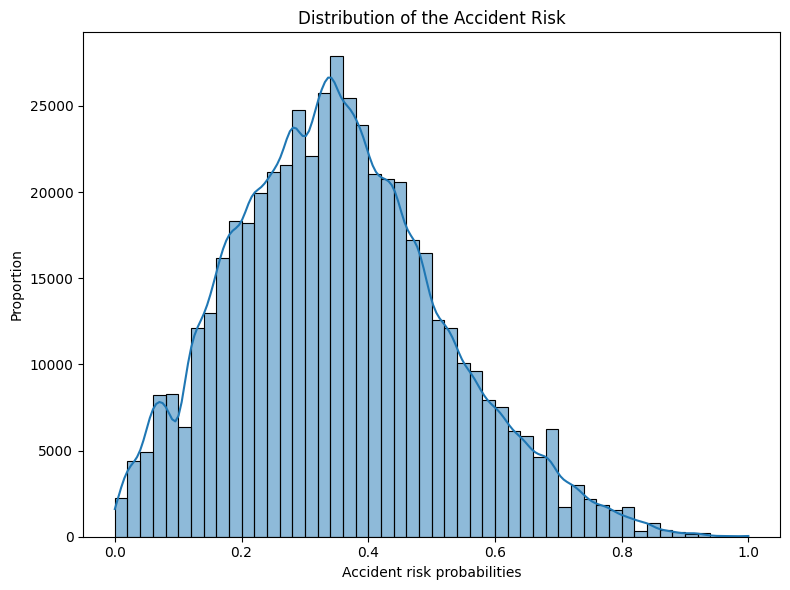

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(data=y, kde=True, bins=50)
plt.title('Distribution of the Accident Risk')
plt.xlabel('Accident risk probabilities')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

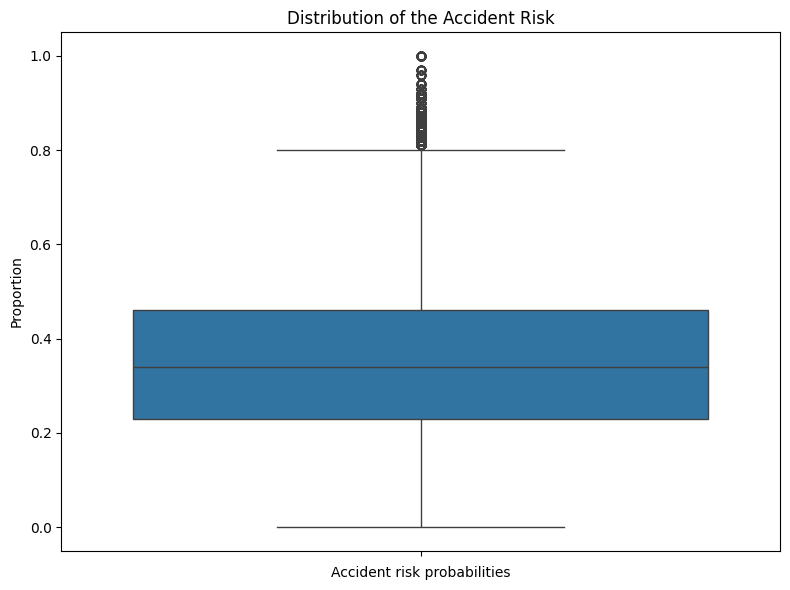

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=y)
plt.title('Distribution of the Accident Risk')
plt.xlabel('Accident risk probabilities')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

In [ ]:
count_high_risk = (y >= 0.8).sum()
print(f"The total number of accident risks >= 0.8 is: {count_high_risk}")

The total number of accident risks >= 0.8 is: 3956


## Feature Distribution Analysis

To understand the characteristics of our dataset, we perform a feature distribution analysis, distinguishing between categorical and numerical features.

### Identifying Feature Types
First, we identify categorical and numerical features within the `X` DataFrame. Categorical features are typically those with `object` or `category` data types, representing distinct groups or labels. Numerical features, on the other hand, are those with `int64` or `float64` data types, representing measurable quantities.

### Visualizing Categorical Feature Distributions
For categorical features, we use `seaborn.countplot` to visualize their distributions. A count plot displays the number of occurrences of each unique category in a feature. This helps us understand the frequency and balance of categories, which is crucial for identifying potential imbalances that might affect model training.

### Visualizing Numerical Feature Distributions
For numerical features, we employ `seaborn.histplot` with `kde=True` and `bins=50`. A histogram shows the frequency distribution of a numerical variable by dividing the data into bins and counting the data points within each bin. The `kde=True` argument adds a Kernel Density Estimate (KDE) curve, which provides a smoothed representation of the distribution. This visualization helps us understand the spread of the data, its central tendency (mean, median), and its shape (e.g., normal, skewed, multimodal), as well as identify potential outliers or unusual patterns.

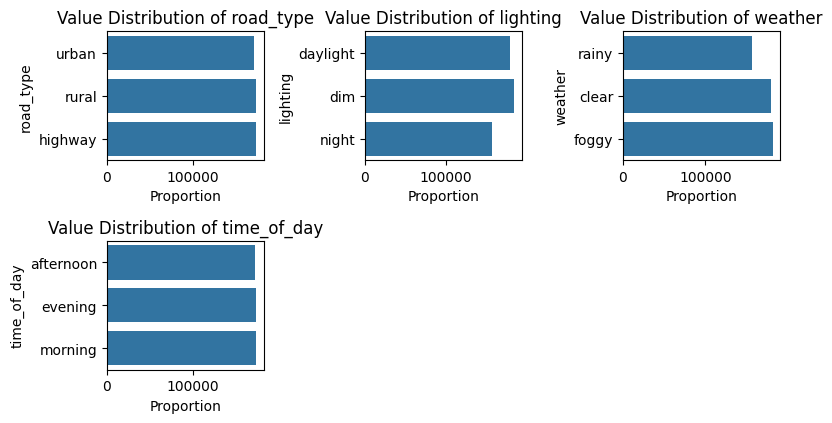

In [ ]:
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = X.select_dtypes(exclude=['object', 'category', 'bool']).columns.tolist()

plt.figure(figsize=(8,6))

for i, col in enumerate(cat_features):
  plt.subplot(3,3,i+1)
  sns.countplot(data=X[col])
  plt.title(f'Value Distribution of {col}')
  plt.ylabel(f'{col}')
  plt.xlabel('Proportion')
plt.tight_layout()
plt.show()

In [ ]:
for feature in cat_features:
  val_distribution = X[feature].value_counts()
  print(val_distribution)

road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64
lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64
weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64
time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

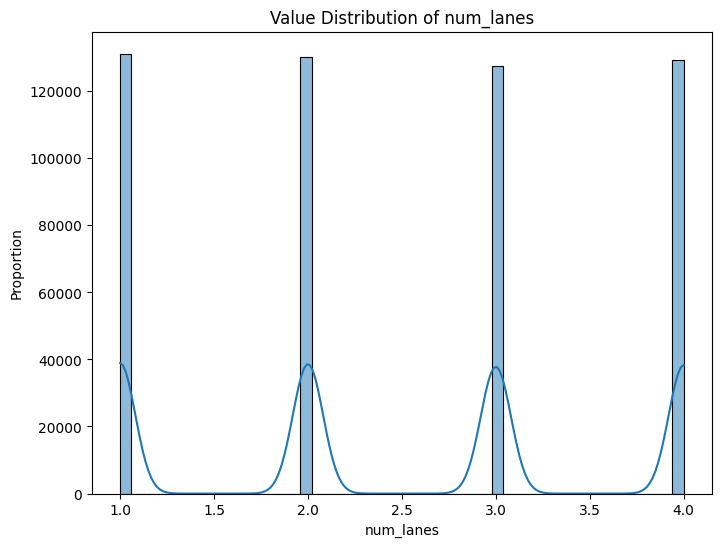

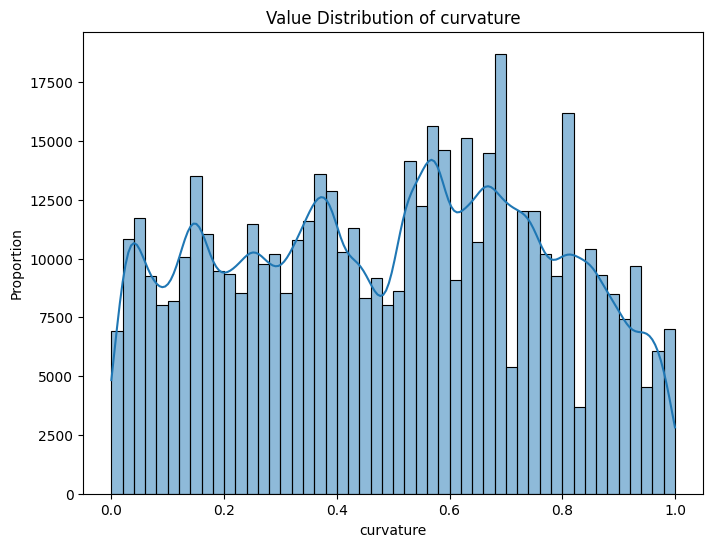

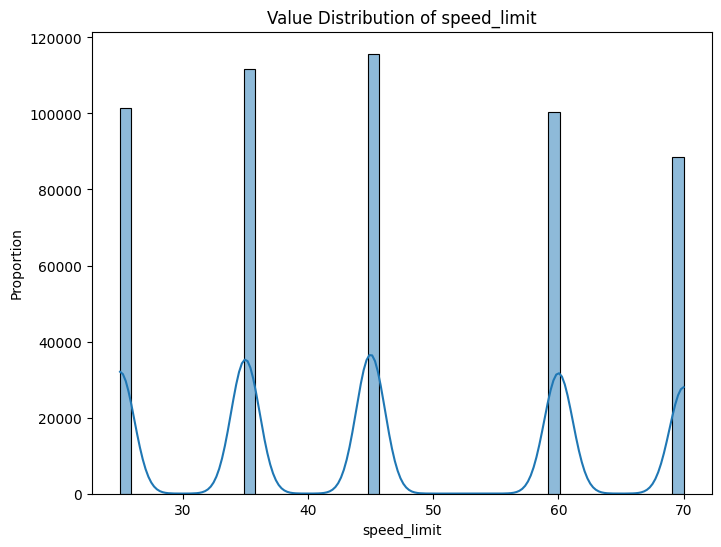

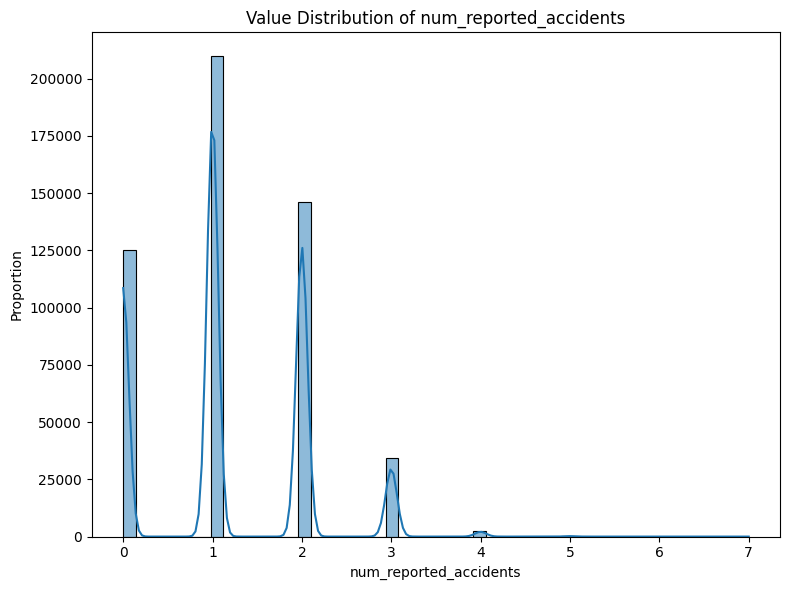

In [ ]:
plt.figure(figsize=(8,6))

for i, col in enumerate(num_features):
  plt.figure(figsize=(8,6))
  sns.histplot(data=X[col], kde=True, bins=50)
  plt.title(f'Value Distribution of {col}')
  plt.xlabel(f'{col}')
  plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

bool_features = X.select_dtypes(include=['bool']).columns.tolist()

encoder = LabelEncoder()
for feature in cat_features:
  X[feature] = encoder.fit_transform(X[feature])

for feature in bool_features:
  X[feature] = encoder.fit_transform(X[feature])

X.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
id,,,,,,,,,,,,
0,2,2,0.06,35,0,2,0,1,0,0,1,1
1,2,4,0.99,35,0,0,1,0,1,1,1,0
2,1,4,0.63,70,1,0,0,1,2,1,0,2
3,0,4,0.07,35,1,2,1,1,2,0,0,1
4,1,1,0.58,60,0,1,0,0,1,1,0,1


<Axes: >

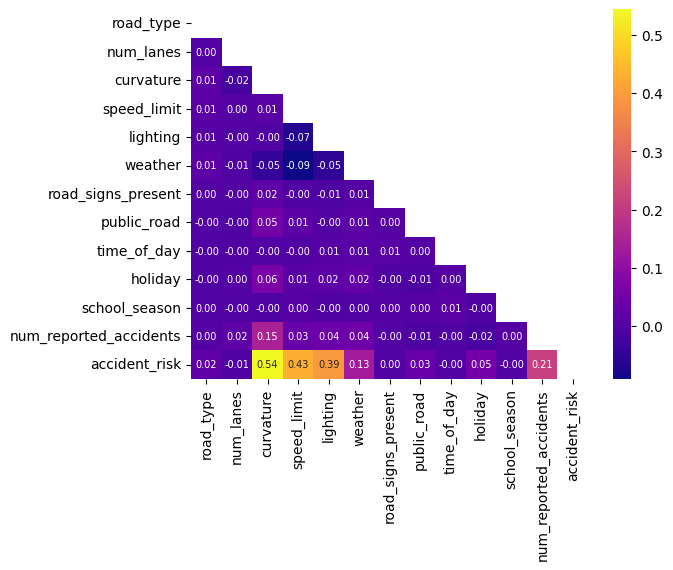

In [ ]:
df_modified = pd.concat([X, y], axis=1)
corr_df_modified = df_modified.corr()

mask = np.triu(corr_df_modified)

sns.heatmap(
    data=corr_df_modified,
    cmap='plasma',
    annot=True,
    cbar=True,
    mask=mask,
    annot_kws={'size': 7},
    fmt='.2f'
  )

In [ ]:
for col in X.columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=X[col])
  plt.title(f'Outlier check for {col}')
  plt.xlabel(f'{col}')
  plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

In [ ]:
from lightgbm import LGBMRegressor
def get_feature_importance(X, y, regressor):
    """Get feature importance from the input model"""
    model = regressor(random_state=42)
    model.fit(X, y)

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    return importance_df

# Get feature importance
features_to_use = [col for col in X.columns]
X = X[features_to_use]
# y = X['BeatsPerMinute']

importance_df = get_feature_importance(X, y, LGBMRegressor)

# Visualize feature importance
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importance from LightGBM', fontsize=16)
plt.tight_layout()
plt.show()

print("Top 10 most important features:")
print(importance_df.head(10))

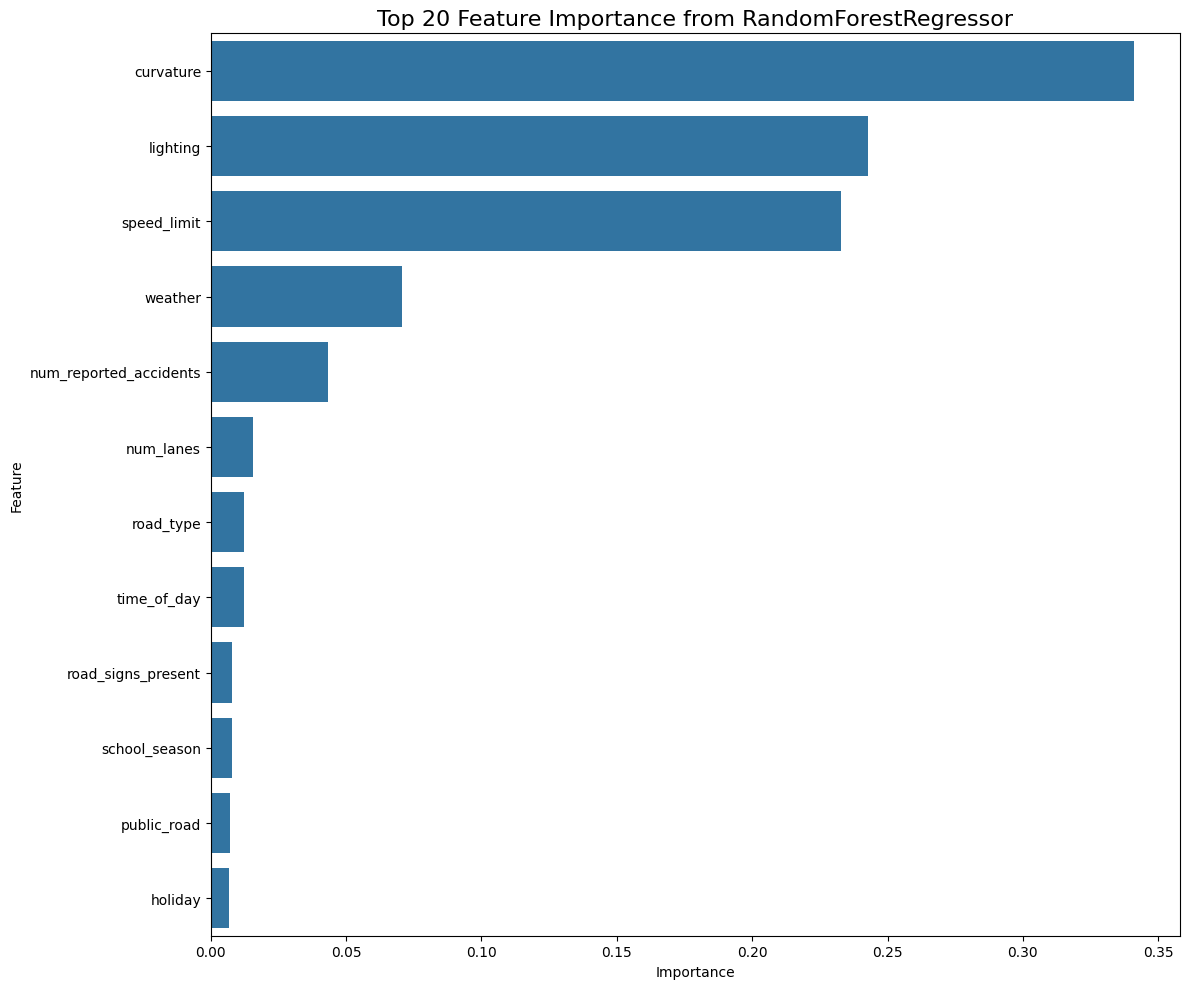

Top 10 most important features:
                   Feature  Importance
2                curvature    0.340995
4                 lighting    0.242727
3              speed_limit    0.232965
5                  weather    0.070682
11  num_reported_accidents    0.043174
1                num_lanes    0.015558
0                road_type    0.012330
8              time_of_day    0.012092
6       road_signs_present    0.007713
10           school_season    0.007708


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_importance_df = get_feature_importance(X, y, RandomForestRegressor)

# Visualize feature importance
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(20))
plt.title('Top 20 Feature Importance from RandomForestRegressor', fontsize=16)
plt.tight_layout()
plt.show()

print("Top 10 most important features:")
print(rf_importance_df.head(10))

In [ ]:
skewness = X.skew()
skewed_columns = skewness[abs(skewness) > 0]
print('Skewed Columns')
print(skewed_columns.sort_values(ascending=False))

Skewed Columns
num_reported_accidents    0.373969
speed_limit               0.181160
weather                   0.078150
lighting                  0.077075
num_lanes                 0.012775
school_season             0.009943
road_type                 0.008191
road_signs_present        0.003183
time_of_day              -0.006750
public_road              -0.009024
holiday                  -0.013992
curvature                -0.038685
dtype: float64


### Baseline Model Training and Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def training_pipeline(X, y, model):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)
  if model == 'rf':
    rf = RandomForestRegressor(
        criterion='friedman_mse',
        max_depth=100,
        min_impurity_decrease=0.001,
        random_state=42,
        verbose=1
    )
    rf.fit(X_train, y_train)
    print('Random Forest Regressor has been trained')
    y_val_preds = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_preds))
    print('RMSE for the Random Forest Regressor model: ', rmse)
  else:
    sgdr = SGDRegressor(
        verbose=1,
        random_state=42
    )
    sgdr.fit(X_train, y_train)
    print('SGDRegressor has been trained')
    y_val_preds = sgdr.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_preds))
    print('RMSE for the SGDRegressor model: ', rmse)
  return rmse

# rf_rmse = training_pipeline(X, y, 'rf')
# sgdr_rmse = training_pipeline(X, y, 'sgdr')

In [ ]:
%%capture
pip install optuna comet_ml optuna-integration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.7 MB/s eta 0:00:00
  Attempting uninstall: python-box
    Found existing installation: python-box 7.3.2
    Uninstalling python-box-7.3.2:
      Successfully uninstalled python-box-7.3.2


In [ ]:
import comet_ml

comet_ml.login()

In [ ]:
import optuna
from optuna_integration.comet import CometCallback

study = optuna.create_study()
comet = CometCallback(
    study, project_name="predict-road-accident", metric_names=["score"]
)

[I 2025-12-27 17:23:16,741] A new study created in memory with name: no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
/tmp/ipython-input-2641960824.py:5: ExperimentalWarning: CometCallback is experimental (supported from v4.0.0). The interface can change in the future.
  comet = CometCallback(


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

@comet.track_in_comet()
def objective(trial):

    # Invoke suggest methods of a Trial object to generate hyperparameters.
    regressor_name = trial.suggest_categorical('classifier', ['sgdr', 'rf'])
    if regressor_name == 'sgdr':
      loss = trial.suggest_categorical('loss', ['squared_error', 'epsilon_insensitive'])
      alpha = trial.suggest_float('alpha', 0.0001, 0.001)
      learning_rate = trial.suggest_categorical('learning_rate', ['optimal', 'invscaling', 'adaptive'])
      max_iter = trial.suggest_int('max_iter', 900, 1200)
      epsilon = trial.suggest_float('epsilon', 0.01, 0.1)

      regressor_obj = SGDRegressor(
        loss=loss,
        penalty='l2',
        alpha=alpha,
        max_iter=max_iter,
        epsilon=epsilon,
        learning_rate=learning_rate,
        random_state=42,
        verbose=1,
    )
    else:
      max_depth = trial.suggest_int('max_depth', 50, 250)
      min_samples_split = trial.suggest_int('min_samples_split', 2, 8)
      min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0001, 0.001)
      max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 200, 300)
      min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 11)
      n_estimators = trial.suggest_int('n_estimators', 80, 150)
      criterion=trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse'])

      regressor_obj = RandomForestRegressor(
        max_depth= max_depth,
        min_samples_split= min_samples_split,
        min_impurity_decrease= min_impurity_decrease,
        max_leaf_nodes= max_leaf_nodes,
        min_samples_leaf= min_samples_leaf,
        random_state= 42,
        n_estimators=n_estimators,
        criterion=criterion,
        verbose=1,
    )


    regressor_obj.fit(X_train, y_train)
    y_pred = regressor_obj.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    return rmse

study.optimize(objective, n_trials=100, callbacks=[comet])

trial = study.best_trial

print("Accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : lovely_cornice_9728
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/97bf4be3d03e4f6eba8c075dbc513c6d
COMET INFO:   Others:
COMET INFO:     notebook_url      : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optuna_study_name : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET 

-- Epoch 1
Norm: 1.14, NNZs: 12, Bias: -0.790000, T: 362427, Avg. loss: 11.906755
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 0.82, NNZs: 12, Bias: -0.450000, T: 724854, Avg. loss: 11.907203
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 1.17, NNZs: 12, Bias: -0.720000, T: 1087281, Avg. loss: 11.906951
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 1.09, NNZs: 12, Bias: -0.060000, T: 1449708, Avg. loss: 11.909886
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 1.13, NNZs: 12, Bias: -0.240000, T: 1812135, Avg. loss: 11.910800
Total training time: 0.55 seconds.
-- Epoch 6
Norm: 1.09, NNZs: 12, Bias: -0.600000, T: 2174562, Avg. loss: 11.909585
Total training time: 0.66 seconds.
-- Epoch 7
Norm: 0.34, NNZs: 12, Bias: -0.218000, T: 2536989, Avg. loss: 2.319714
Total training time: 0.77 seconds.
-- Epoch 8
Norm: 0.39, NNZs: 12, Bias: -0.170000, T: 2899416, Avg. loss: 2.319513
Total training time: 0.87 seconds.
-- Epoch 9
Norm: 0.24, NNZs: 12, Bias: -0.182000, T: 3261843

[I 2025-12-27 18:13:01,729] Trial 1 finished with value: 0.08852553716378649 and parameters: {'classifier': 'sgdr', 'loss': 'epsilon_insensitive', 'alpha': 0.000237078941499034, 'learning_rate': 'adaptive', 'max_iter': 1004, 'epsilon': 0.04886950680979513}. Best is trial 1 with value: 0.08852553716378649.


Norm: 0.34, NNZs: 12, Bias: -0.186120, T: 14859507, Avg. loss: 0.032651
Total training time: 3.54 seconds.
Convergence after 41 epochs took 3.54 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : glorious_legend_9209
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/449a1b44b28442b9bbf74a9665ee96cc
COMET INFO:   Metrics:
COMET INFO:     score : 0.08852553716378649
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.08852553716378649
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"classifier

-- Epoch 1
Norm: 0.89, NNZs: 12, Bias: 0.310000, T: 362427, Avg. loss: 11.850826
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.81, NNZs: 12, Bias: -0.740000, T: 724854, Avg. loss: 11.846697
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 12, Bias: -0.400000, T: 1087281, Avg. loss: 11.843243
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 1.38, NNZs: 12, Bias: -0.370000, T: 1449708, Avg. loss: 11.851730
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 1.20, NNZs: 12, Bias: -0.470000, T: 1812135, Avg. loss: 11.852252
Total training time: 0.58 seconds.
-- Epoch 6
Norm: 0.83, NNZs: 12, Bias: -0.180000, T: 2174562, Avg. loss: 11.848915
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 0.90, NNZs: 12, Bias: -0.510000, T: 2536989, Avg. loss: 11.848713
Total training time: 0.81 seconds.
-- Epoch 8
Norm: 1.27, NNZs: 12, Bias: 0.110000, T: 2899416, Avg. loss: 11.844919
Total training time: 0.95 seconds.
-- Epoch 9
Norm: 0.40, NNZs: 12, Bias: -0.264000, T: 3261843

[I 2025-12-27 18:13:54,551] Trial 3 finished with value: 0.08880800497423354 and parameters: {'classifier': 'sgdr', 'loss': 'epsilon_insensitive', 'alpha': 0.0006420292421046324, 'learning_rate': 'adaptive', 'max_iter': 1158, 'epsilon': 0.08688755892368386}. Best is trial 2 with value: 0.08630416304756525.


Norm: 0.34, NNZs: 12, Bias: -0.190660, T: 15946788, Avg. loss: 0.015291
Total training time: 4.34 seconds.
-- Epoch 45
Norm: 0.34, NNZs: 12, Bias: -0.190655, T: 16309215, Avg. loss: 0.015294
Total training time: 4.41 seconds.
Convergence after 45 epochs took 4.41 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : rainy_cupola_3960
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/e6bdc5c498984cf09609d81f0a2c0e81
COMET INFO:   Metrics:
COMET INFO:     score : 0.08880800497423354
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.08880800497423354
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"classifier": 

-- Epoch 1
Norm: 20834710.06, NNZs: 12, Bias: -55034763.807741, T: 362427, Avg. loss: 36510779724102901956608.000000
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 320777.94, NNZs: 12, Bias: -852171.058674, T: 724854, Avg. loss: 14059156328202.451172
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 4607.71, NNZs: 12, Bias: -21928.102498, T: 1087281, Avg. loss: 3150256348.196187
Total training time: 0.24 seconds.
-- Epoch 4
Norm: nan, NNZs: 12, Bias: -767.464391, T: 1449708, Avg. loss: 2108305.964446
Total training time: 0.31 seconds.
-- Epoch 5
Norm: nan, NNZs: 12, Bias: -32.733945, T: 1812135, Avg. loss: 2593.132487
Total training time: 0.39 seconds.
-- Epoch 6
Norm: nan, NNZs: 12, Bias: -1.816738, T: 2174562, Avg. loss: 4.778259
Total training time: 0.48 seconds.
-- Epoch 7
Norm: nan, NNZs: 12, Bias: -0.281904, T: 2536989, Avg. loss: 0.017867
Total training time: 0.56 seconds.
-- Epoch 8
Norm: nan, NNZs: 12, Bias: -0.194144, T: 2899416, Avg. loss: 0.005937
Total training time

[I 2025-12-27 18:13:58,770] Trial 4 finished with value: 0.08874294124677706 and parameters: {'classifier': 'sgdr', 'loss': 'squared_error', 'alpha': 0.000183025127842285, 'learning_rate': 'invscaling', 'max_iter': 1096, 'epsilon': 0.02213393512098122}. Best is trial 2 with value: 0.08630416304756525.


Norm: nan, NNZs: 12, Bias: -0.188954, T: 4349124, Avg. loss: 0.005583
Total training time: 0.97 seconds.
-- Epoch 13
Norm: nan, NNZs: 12, Bias: -0.188615, T: 4711551, Avg. loss: 0.005531
Total training time: 1.05 seconds.
Convergence after 13 epochs took 1.05 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : developed_watt_4351
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/ab754e4ccbe64d47a8a2b99d4420e514
COMET INFO:   Metrics:
COMET INFO:     score : 0.08874294124677706
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.08874294124677706
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"classifier"

-- Epoch 1
Norm: 661217214041.34, NNZs: 12, Bias: 160100784886.257019, T: 362427, Avg. loss: 102198341059161870067126239232.000000
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 652501696616.36, NNZs: 12, Bias: -136474414153.297852, T: 724854, Avg. loss: 60345823098974575456681984.000000
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 193572776270.84, NNZs: 12, Bias: 48733643176.457695, T: 1087281, Avg. loss: 19031800216005323471716352.000000
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 276600547937.78, NNZs: 12, Bias: 147463692937.651001, T: 1449708, Avg. loss: 8923046997918789069176832.000000
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 107973194470.13, NNZs: 12, Bias: 14324451871.070515, T: 1812135, Avg. loss: 4857320721476311442259968.000000
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 139008942818.80, NNZs: 12, Bias: 20410912369.144024, T: 2174562, Avg. loss: 2793265344211938099331072.000000
Total training time: 0.46 seconds.
-- Epoch 7
Norm: 91234184

[I 2025-12-27 18:14:04,989] Trial 5 finished with value: 0.0912271807431842 and parameters: {'classifier': 'sgdr', 'loss': 'squared_error', 'alpha': 0.00026307137251344135, 'learning_rate': 'optimal', 'max_iter': 933, 'epsilon': 0.0801235818848139}. Best is trial 2 with value: 0.08630416304756525.


Norm: 45992.11, NNZs: 12, Bias: -0.189210, T: 10872810, Avg. loss: 0.008085
Total training time: 2.88 seconds.
Convergence after 30 epochs took 2.88 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : select_suv_1206
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/75db675445ef40a5bf584c5bffe90368
COMET INFO:   Metrics:
COMET INFO:     score : 0.0912271807431842
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.0912271807431842
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"classifier": "sgd

-- Epoch 1
Norm: 589567188559.59, NNZs: 12, Bias: -291393527641.355408, T: 362427, Avg. loss: 50989715565717681950519459840.000000
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 223819057715.73, NNZs: 12, Bias: 31546454013.747017, T: 724854, Avg. loss: 19118300027636204464766976.000000
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 162132280726.00, NNZs: 12, Bias: 39025944372.676773, T: 1087281, Avg. loss: 5547635577232684461588480.000000
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 115266465820.61, NNZs: 12, Bias: -10573656232.473473, T: 1449708, Avg. loss: 2141875797547401619701760.000000
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 53986798364.84, NNZs: 12, Bias: -8942776871.785465, T: 1812135, Avg. loss: 951927067871174935445504.000000
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 49209905942.95, NNZs: 12, Bias: -5216370939.090878, T: 2174562, Avg. loss: 410455680921861206573056.000000
Total training time: 0.45 seconds.
-- Epoch 7
Norm: 16522797720.78,

[I 2025-12-27 18:14:10,979] Trial 6 finished with value: 0.15481569239285786 and parameters: {'classifier': 'sgdr', 'loss': 'squared_error', 'alpha': 0.00045528398872726294, 'learning_rate': 'optimal', 'max_iter': 1102, 'epsilon': 0.025020731699606714}. Best is trial 2 with value: 0.08630416304756525.


Norm: 24039.33, NNZs: 12, Bias: -0.185834, T: 7610967, Avg. loss: 0.006687
Total training time: 1.54 seconds.
Convergence after 21 epochs took 1.54 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : monetary_mockingbird_2815
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/aa3d6bf62e104cdbafa6de0b8c44ffb9
COMET INFO:   Metrics:
COMET INFO:     score : 0.15481569239285786
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.15481569239285786
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"class

-- Epoch 1
Norm: 177779272921.12, NNZs: 12, Bias: 28931168458.853016, T: 362427, Avg. loss: 20420797752461839551025905664.000000
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 81209052999.23, NNZs: 12, Bias: -28436607539.373096, T: 724854, Avg. loss: 3656023089673557977858048.000000
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 37856464359.77, NNZs: 12, Bias: -1512428394.238742, T: 1087281, Avg. loss: 628411768515191501750272.000000
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 7344165541.53, NNZs: 12, Bias: -1558358025.253113, T: 1449708, Avg. loss: 70663458305611587911680.000000
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 716821.05, NNZs: 12, Bias: -1808475.472691, T: 1812135, Avg. loss: 554591138651718156288.000000
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 32059.08, NNZs: 12, Bias: -4087.906796, T: 2174562, Avg. loss: 65682244857.784660
Total training time: 0.74 seconds.
-- Epoch 7
Norm: 27447.27, NNZs: 12, Bias: -23.567122, T: 2536989, Avg. loss: 

[I 2025-12-27 18:18:20,734] Trial 9 finished with value: 0.09388631424126218 and parameters: {'classifier': 'sgdr', 'loss': 'squared_error', 'alpha': 0.000928528305112191, 'learning_rate': 'optimal', 'max_iter': 1149, 'epsilon': 0.05432166828993586}. Best is trial 8 with value: 0.05614212711323606.


Norm: 13724.14, NNZs: 12, Bias: -0.187176, T: 5073978, Avg. loss: 0.005578
Total training time: 1.66 seconds.
-- Epoch 15
Norm: 12809.23, NNZs: 12, Bias: -0.187380, T: 5436405, Avg. loss: 0.005387
Total training time: 1.76 seconds.
Convergence after 15 epochs took 1.76 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : witty_contract_9340
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/eadd011707bc4edfaa2bc1b16832d569
COMET INFO:   Metrics:
COMET INFO:     score : 0.09388631424126218
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.09388631424126218
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"classifier"

-- Epoch 1
Norm: 0.35, NNZs: 12, Bias: -0.167018, T: 362427, Avg. loss: 0.498077
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 12, Bias: -0.163143, T: 724854, Avg. loss: 0.303111
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 0.35, NNZs: 12, Bias: -0.178851, T: 1087281, Avg. loss: 0.253300
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 0.34, NNZs: 12, Bias: -0.173453, T: 1449708, Avg. loss: 0.226131
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 0.34, NNZs: 12, Bias: -0.176860, T: 1812135, Avg. loss: 0.208786
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 0.34, NNZs: 12, Bias: -0.174960, T: 2174562, Avg. loss: 0.194810
Total training time: 0.74 seconds.
-- Epoch 7
Norm: 0.34, NNZs: 12, Bias: -0.165934, T: 2536989, Avg. loss: 0.183592
Total training time: 0.87 seconds.
-- Epoch 8
Norm: 0.35, NNZs: 12, Bias: -0.177997, T: 2899416, Avg. loss: 0.175710
Total training time: 1.00 seconds.
-- Epoch 9
Norm: 0.34, NNZs: 12, Bias: -0.168215, T: 3261843, Avg.

[I 2025-12-27 18:49:42,937] Trial 30 finished with value: 0.26819310564232135 and parameters: {'classifier': 'sgdr', 'loss': 'epsilon_insensitive', 'alpha': 0.0009084244310553263, 'learning_rate': 'invscaling', 'max_iter': 913, 'epsilon': 0.09449882075526964}. Best is trial 10 with value: 0.05610411987781595.


Norm: 0.34, NNZs: 12, Bias: -0.172256, T: 16309215, Avg. loss: 0.095201
Total training time: 4.60 seconds.
Convergence after 45 epochs took 4.60 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : endless_gull_8281
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/67750285393f4f608998c7a21ef37f2a
COMET INFO:   Metrics:
COMET INFO:     score : 0.26819310564232135
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.26819310564232135
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"classifier": 

-- Epoch 1
Norm: 0.64, NNZs: 12, Bias: 0.100000, T: 362427, Avg. loss: 11.965140
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.15, NNZs: 12, Bias: -0.310000, T: 724854, Avg. loss: 11.967055
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 12, Bias: 0.010000, T: 1087281, Avg. loss: 11.965252
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 0.70, NNZs: 12, Bias: 0.520000, T: 1449708, Avg. loss: 11.965488
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 1.28, NNZs: 12, Bias: 0.190000, T: 1812135, Avg. loss: 11.964284
Total training time: 0.39 seconds.
-- Epoch 6
Norm: 1.16, NNZs: 12, Bias: -0.220000, T: 2174562, Avg. loss: 11.965306
Total training time: 0.47 seconds.
-- Epoch 7
Norm: 0.34, NNZs: 12, Bias: -0.030000, T: 2536989, Avg. loss: 2.384175
Total training time: 0.55 seconds.
-- Epoch 8
Norm: 0.48, NNZs: 12, Bias: -0.136000, T: 2899416, Avg. loss: 2.382316
Total training time: 0.62 seconds.
-- Epoch 9
Norm: 0.43, NNZs: 12, Bias: -0.150000, T: 3261843, Av

[I 2025-12-27 18:56:57,109] Trial 36 finished with value: 0.0885911656769165 and parameters: {'classifier': 'sgdr', 'loss': 'epsilon_insensitive', 'alpha': 0.0006681953715223718, 'learning_rate': 'adaptive', 'max_iter': 996, 'epsilon': 0.010141925521815136}. Best is trial 10 with value: 0.05610411987781595.


Norm: 0.34, NNZs: 12, Bias: -0.183844, T: 15221934, Avg. loss: 0.061654
Total training time: 3.31 seconds.
-- Epoch 43
Norm: 0.34, NNZs: 12, Bias: -0.183878, T: 15584361, Avg. loss: 0.061669
Total training time: 3.38 seconds.
Convergence after 43 epochs took 3.38 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : universal_canyon_7127
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/0856a91f204248f5b1a5d05fa4fbaf6b
COMET INFO:   Metrics:
COMET INFO:     score : 0.0885911656769165
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.0885911656769165
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"classifier"

-- Epoch 1
Norm: 0.35, NNZs: 12, Bias: -0.165566, T: 362427, Avg. loss: 0.547744
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 12, Bias: -0.162881, T: 724854, Avg. loss: 0.346520
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.35, NNZs: 12, Bias: -0.158189, T: 1087281, Avg. loss: 0.296212
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 0.33, NNZs: 12, Bias: -0.175567, T: 1449708, Avg. loss: 0.267000
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 0.34, NNZs: 12, Bias: -0.165042, T: 1812135, Avg. loss: 0.247610
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 0.34, NNZs: 12, Bias: -0.167666, T: 2174562, Avg. loss: 0.232611
Total training time: 0.49 seconds.
-- Epoch 7
Norm: 0.34, NNZs: 12, Bias: -0.170722, T: 2536989, Avg. loss: 0.220750
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 0.34, NNZs: 12, Bias: -0.176678, T: 2899416, Avg. loss: 0.211429
Total training time: 0.65 seconds.
-- Epoch 9
Norm: 0.33, NNZs: 12, Bias: -0.175352, T: 3261843, Avg.

[I 2025-12-27 18:58:40,158] Trial 38 finished with value: 0.08998787939055687 and parameters: {'classifier': 'sgdr', 'loss': 'epsilon_insensitive', 'alpha': 0.000476013843673145, 'learning_rate': 'invscaling', 'max_iter': 1198, 'epsilon': 0.0694974088500337}. Best is trial 10 with value: 0.05610411987781595.


Norm: 0.34, NNZs: 12, Bias: -0.177218, T: 17758923, Avg. loss: 0.120265
Total training time: 4.75 seconds.
Convergence after 49 epochs took 4.75 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : theoretical_neutron_3292
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/40a3c39d03b84525ae05e0ccdae03eea
COMET INFO:   Metrics:
COMET INFO:     score : 0.08998787939055687
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.08998787939055687
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"classi

-- Epoch 1
Norm: 5648546.71, NNZs: 12, Bias: 15010595.539104, T: 362427, Avg. loss: 36065427009543010779136.000000
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 86199.34, NNZs: 12, Bias: 230241.264921, T: 724854, Avg. loss: 1041684946489.145386
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 5152.12, NNZs: 12, Bias: 5874.870695, T: 1087281, Avg. loss: 228972794.877938
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 4288.07, NNZs: 12, Bias: 203.809054, T: 1449708, Avg. loss: 150698.018606
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 3966.68, NNZs: 12, Bias: 8.403462, T: 1812135, Avg. loss: 182.628045
Total training time: 0.44 seconds.
-- Epoch 6
Norm: 3683.97, NNZs: 12, Bias: 0.239359, T: 2174562, Avg. loss: 0.339991
Total training time: 0.53 seconds.
-- Epoch 7
Norm: 3431.80, NNZs: 12, Bias: -0.164576, T: 2536989, Avg. loss: 0.006964
Total training time: 0.62 seconds.
-- Epoch 8
Norm: 3204.89, NNZs: 12, Bias: -0.185572, T: 2899416, Avg. loss: 0.005925
Total trainin

[I 2025-12-27 19:00:05,143] Trial 40 finished with value: 0.08873515624342358 and parameters: {'classifier': 'sgdr', 'loss': 'squared_error', 'alpha': 0.0007662296525294805, 'learning_rate': 'invscaling', 'max_iter': 1032, 'epsilon': 0.03553727422871386}. Best is trial 10 with value: 0.05610411987781595.


Norm: 2483.21, NNZs: 12, Bias: -0.187647, T: 4349124, Avg. loss: 0.005585
Total training time: 1.03 seconds.
-- Epoch 13
Norm: 2338.14, NNZs: 12, Bias: -0.187311, T: 4711551, Avg. loss: 0.005533
Total training time: 1.11 seconds.
Convergence after 13 epochs took 1.11 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : alive_pollen_8097
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/99776b7c282d46089cbc86ace7329b7c
COMET INFO:   Metrics:
COMET INFO:     score : 0.08873515624342358
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.08873515624342358
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"classifier": 

-- Epoch 1
Norm: 1025676780879.09, NNZs: 12, Bias: 23814804825.541702, T: 362427, Avg. loss: 111284436609024451869147136.000000
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 1012986335999.86, NNZs: 12, Bias: 289760205155.153015, T: 724854, Avg. loss: 111403858727669348209524736.000000
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 1616798282979.29, NNZs: 12, Bias: 459039589714.671204, T: 1087281, Avg. loss: 111202808111480502705192960.000000
Total training time: 0.23 seconds.
-- Epoch 4
Norm: 1235431923167.07, NNZs: 12, Bias: 208348083165.655121, T: 1449708, Avg. loss: 111415835146212267337449472.000000
Total training time: 0.31 seconds.
-- Epoch 5
Norm: 1237245063666.66, NNZs: 12, Bias: -303485992157.588989, T: 1812135, Avg. loss: 111592429784896206071136256.000000
Total training time: 0.38 seconds.
-- Epoch 6
Norm: 686473389674.83, NNZs: 12, Bias: 32454622664.004745, T: 2174562, Avg. loss: 111484236209688326294208512.000000
Total training time: 0.46 seconds.
-- Epoch 7
Nor

[I 2025-12-27 19:09:53,272] Trial 48 finished with value: 0.08856369965888113 and parameters: {'classifier': 'sgdr', 'loss': 'squared_error', 'alpha': 0.0003737955497275236, 'learning_rate': 'adaptive', 'max_iter': 960, 'epsilon': 0.06735879046843815}. Best is trial 47 with value: 0.05609825221334487.


Norm: nan, NNZs: 12, Bias: -0.188779, T: 17396496, Avg. loss: 0.003924
Total training time: 4.70 seconds.
-- Epoch 49
Norm: nan, NNZs: 12, Bias: -0.188777, T: 17758923, Avg. loss: 0.003923
Total training time: 4.79 seconds.
Convergence after 49 epochs took 4.79 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : key_antelope_5563
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/6bd974bf8061410997c96822e3c65a0e
COMET INFO:   Metrics:
COMET INFO:     score : 0.08856369965888113
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.08856369965888113
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"classifier": 

-- Epoch 1
Norm: 0.35, NNZs: 12, Bias: -0.222441, T: 362427, Avg. loss: 29.856925
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 0.36, NNZs: 12, Bias: -0.220305, T: 724854, Avg. loss: 2.664558
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 12, Bias: -0.190063, T: 1087281, Avg. loss: 1.531413
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 0.39, NNZs: 12, Bias: -0.176468, T: 1449708, Avg. loss: 1.069457
Total training time: 0.47 seconds.
-- Epoch 5
Norm: 0.34, NNZs: 12, Bias: -0.140264, T: 1812135, Avg. loss: 0.816573
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 0.32, NNZs: 12, Bias: -0.171577, T: 2174562, Avg. loss: 0.658523
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 0.35, NNZs: 12, Bias: -0.173543, T: 2536989, Avg. loss: 0.549909
Total training time: 0.80 seconds.
-- Epoch 8
Norm: 0.33, NNZs: 12, Bias: -0.158486, T: 2899416, Avg. loss: 0.470448
Total training time: 0.91 seconds.
-- Epoch 9
Norm: 0.33, NNZs: 12, Bias: -0.184090, T: 3261843, Avg

[I 2025-12-27 19:42:16,243] Trial 69 finished with value: 0.19139879705696836 and parameters: {'classifier': 'sgdr', 'loss': 'epsilon_insensitive', 'alpha': 0.0008400476153307006, 'learning_rate': 'optimal', 'max_iter': 1065, 'epsilon': 0.0422251996328381}. Best is trial 50 with value: 0.05609626521029798.


Norm: 0.34, NNZs: 12, Bias: -0.177792, T: 19933485, Avg. loss: 0.069992
Total training time: 4.88 seconds.
Convergence after 55 epochs took 4.88 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : inquisitive_rhinoceros_2447
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/694482530c0e47fc998c485244152f39
COMET INFO:   Metrics:
COMET INFO:     score : 0.19139879705696836
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.19139879705696836
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"cla

-- Epoch 1
Norm: 1.14, NNZs: 12, Bias: 0.130000, T: 362427, Avg. loss: 11.831444
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 12, Bias: -0.400000, T: 724854, Avg. loss: 11.826086
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 0.84, NNZs: 12, Bias: -0.020000, T: 1087281, Avg. loss: 11.829251
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 0.88, NNZs: 12, Bias: 0.110000, T: 1449708, Avg. loss: 11.827780
Total training time: 0.32 seconds.
-- Epoch 5
Norm: 1.32, NNZs: 12, Bias: 0.100000, T: 1812135, Avg. loss: 11.829855
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 1.30, NNZs: 12, Bias: 0.410000, T: 2174562, Avg. loss: 11.830237
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 1.10, NNZs: 12, Bias: 0.170000, T: 2536989, Avg. loss: 11.831237
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 0.37, NNZs: 12, Bias: -0.162000, T: 2899416, Avg. loss: 2.223863
Total training time: 0.64 seconds.
-- Epoch 9
Norm: 0.39, NNZs: 12, Bias: -0.190000, T: 3261843, Av

[I 2025-12-27 19:57:15,821] Trial 80 finished with value: 0.08854696273691731 and parameters: {'classifier': 'sgdr', 'loss': 'epsilon_insensitive', 'alpha': 0.00010751704178356224, 'learning_rate': 'adaptive', 'max_iter': 966, 'epsilon': 0.09966533236116448}. Best is trial 75 with value: 0.05609175237693696.


Norm: 0.35, NNZs: 12, Bias: -0.192523, T: 15221934, Avg. loss: 0.011465
Total training time: 3.20 seconds.
Convergence after 42 epochs took 3.20 seconds


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : intact_electron_9838
COMET INFO:     url                   : https://www.comet.com/dreadnought0073/predict-road-accident/a82e4e7110b14de298977c04334d4702
COMET INFO:   Metrics:
COMET INFO:     score : 0.08854696273691731
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId=1-pfM3vWvgIxAp0c4n_zNXejIMy03U9LJ
COMET INFO:     optimizer_id           : no-name-febba77f-5cbb-44a6-a0a3-fc74df828420
COMET INFO:     optimizer_metric       : score
COMET INFO:     optimizer_metric_value : 0.08854696273691731
COMET INFO:     optimizer_objective    : 1
COMET INFO:     optimizer_parameters   : {"classifier

## Deep Learning Model Implementation

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from itertools import combinations
import torch.nn as nn
import pandas as pd
import numpy as np
import warnings
import torch
from comet_ml import start
from comet_ml.integration.pytorch import log_model
from sklearn.preprocessing import OrdinalEncoder

# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
API_KEY = "Your API Key"
experiment = start(
  api_key=API_KEY,
  project_name="predict-road-accident-dl",
  workspace="dreadnought0073"
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/dreadnought0073/predict-road-accident-dl/b4d48e572e7f463bbf58cd62d1b41317

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


In [ ]:
class Config:
    # Define the target column name
    target = 'accident_risk'

    # Load training, test, and sample submission data
    train = pd.read_csv('train.csv', index_col='id')
    test = pd.read_csv('test.csv', index_col='id')

    # Select computation device (GPU if available, else CPU)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Global random seed for reproducibility
    state = 42

    # Number of folds for cross-validation
    n_splits = 7

    # Early stopping patience for training
    early_stop = 20

    # Define evaluation metric
    metric = 'rmse'

    # Define task type (regression/classification/multiclass)
    task_type = "regression"

    # Boolean flag if the task is regression
    task_is_regression = task_type == 'regression'

    # Flags for preprocessing and feature engineering
    outliers = False      # Whether to remove outliers
    log_trf = False       # Whether to log-transform target
    feature_eng = False    # Whether to create new features
    missing = False       # Whether to impute missing values
    training = True       # Whether to run training (True) or load saved preds (False)

In [ ]:
def root_mean_squared_error(y_train, y_pred):
  return np.sqrt(mean_squared_error(y_train, y_pred))

In [ ]:
def set_seed(seed):
  # Set NumPy seed (controls randomness in NumPy operations)
  np.random.seed(seed)
  # Set PyTorch CPU seed
  torch.manual_seed(seed)
  # Set PyTorch GPU seed (all CUDA devices)
  torch.cuda.manual_seed_all(seed)
  # Ensure deterministic behavior for CuDNN
  torch.backends.cudnn.deterministic = True  # Disable nondeterministic algorithms
  torch.backends.cudnn.benchmark = False     # Turn off autotuner for convolution algorithms

Transformation of the Dataset

In [ ]:
class Transform(Config):
    def __init__(self):
        super().__init__()

        self.num_features = self.train.drop(self.target, axis=1).select_dtypes(exclude=['object', 'category', 'bool']).columns.tolist()

        self.cat_features = self.train.drop(self.target, axis=1).select_dtypes(include=['object', 'category']).columns.tolist()

        self.bool_features = self.train.drop(self.target, axis=1).select_dtypes(include=['bool']).columns.tolist()

        if self.missing:
          self.missing_values()
        if self.feature_eng:
          self.train = self.new_features(self.train)
          self.test = self.new_features(self.test)
        if self.outliers:
          self.remove_outliers()
        if self.log_trf:
          self.log_transformation()
        self.encode()

    def __call__(self):
        self.y = self.train[self.target]

        self.X = self.train.drop(self.target, axis=1)

        self.X_enc = self.train_enc.drop(self.target, axis=1)

        return self.X, self.X_enc, self.y, self.test, self.test_enc, self.cat_features, self.num_features, self.bool_features

    def encode(self):
        self.train_enc = self.train.copy()
        self.test_enc = self.test.copy()

        data = pd.concat([self.train_enc, self.test_enc], axis=0)
        oe = OrdinalEncoder()
        data[self.cat_features] = oe.fit_transform(data[self.cat_features]).astype('int')
        data[self.bool_features] = oe.fit_transform(data[self.bool_features]).astype('int')

        self.train_enc = data[~data[self.target].isna()]
        self.test_enc = data[data[self.target].isna()].drop(self.target, axis=1)
        self.cat_features_card = [data[f].nunique() for f in self.cat_features]

    def new_features(self, data):
        for c1, c2 in list(combinations(self.num_features, 2)):
            data[f"{c1}_{c2}"] = data[c1] * data[c2]
            data[f'{c1}_div_{c2}'] = data[c1] / (data[c2] + 1e-6)
        for c in self.num_features:
            data[f"{c}_quartile"] = pd.cut(data[c], bins=4, labels=False, include_lowest=True)
            data[f"{c}_decile"] = pd.cut(data[c], bins=10, labels=False, include_lowest=True)
        return data

    def log_transformation(self):
        self.train[self.target] = np.log1p(self.train[self.target])

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_features, out_features, dropout):
        super().__init__()

        self.fc = nn.Linear(in_features, out_features)
        self.bn = nn.BatchNorm1d(out_features)
        self.act = nn.ReLU()
        self.fc2 = nn.Linear(out_features, out_features)
        self.bn2 = nn.BatchNorm1d(out_features)
        self.act2 = nn.ReLU()
        self.drop = nn.Dropout(dropout)

        self.shortcut = nn.Identity() if in_features == out_features else nn.Linear(in_features, out_features)

    def forward(self, x):
        out = self.fc(x)
        out = self.bn(out)
        out = self.act(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.act2(out)
        out = self.drop(out)

        res = self.shortcut(x)

        return self.act(out + res)


class MLPRegressor(nn.Module):
    def __init__(self, in_features, hidden_dims, dropout):
        super().__init__()

        layers = []

        prev = in_features

        for h in hidden_dims:
          layers.append(ResidualBlock(prev, h, dropout))
          prev = h

        layers.append(nn.Linear(prev, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x).squeeze(1)

In [ ]:
def train_one_fold(X_tr, y_tr, X_va, y_va, params, epochs, batch_size, patience):
    ds_tr = TensorDataset(torch.from_numpy(X_tr).float(), torch.from_numpy(y_tr).float())
    ds_va = TensorDataset(torch.from_numpy(X_va).float(), torch.from_numpy(y_va).float())

    dl_tr = DataLoader(ds_tr, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2, persistent_workers=True)

    dl_va = DataLoader(ds_va, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=1, persistent_workers=True)

    model = MLPRegressor(
        in_features=X_tr.shape[1],
        hidden_dims=params['hidden_dims'],
        dropout=params['dropout']
    ).to(Config.device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])

    criterion = nn.MSELoss()

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="min", patience=max(patience // 4, 10), factor=0.5
    )

    best_loss = float('inf')
    best_state = None
    no_improve = 0

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for xb, yb in dl_tr:
          xb, yb = xb.to(Config.device), yb.to(Config.device)
          optimizer.zero_grad()
          preds = model(xb)
          loss = criterion(preds, yb)
          loss.backward()
          optimizer.step()
          train_loss += loss.item() * xb.size(0)

        train_loss /= len(ds_tr)
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
          for xb, yb in dl_va:
            xb, yb = xb.to(Config.device), yb.to(Config.device)
            preds_model = model(xb)
            val_loss += criterion(preds_model, yb).item() * xb.size(0)
        val_loss /= len(ds_va)
        scheduler.step(val_loss)
        if (epoch + 1) % patience == 0:
          print(f"Epoch {epoch+1:4d} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

        if val_loss < best_loss:
          best_loss = val_loss
          best_state = {k: v.cpu() for k, v in model.state_dict().items()}
          no_improve = 0
        else:
          no_improve += 1
          if no_improve >= patience:
              print(f"Early stopping at epoch {epoch+1}, best val loss = {best_loss:.6f}")
              break

    model.load_state_dict({k: v.to(Config.device) for k,v in best_state.items()})
    model.eval()
    with torch.no_grad():
      va_out = model(torch.from_numpy(X_va).float().to(Config.device)).cpu().numpy()

    rmse = root_mean_squared_error(y_va, va_out)

    return va_out, rmse, model

In [ ]:
def fit_predict_cv(X, y, X_test, seed=42):
    set_seed(seed)
    X_np = X.values.astype(np.float32)
    y_np = y.values.astype(np.float32)
    X_test_np = X_test.values.astype(np.float32)

    kf = KFold(n_splits=Config.n_splits, shuffle=True, random_state=seed)

    oof = np.zeros(len(X_np), dtype=np.float32)

    test_pred = np.zeros(len(X_test_np), dtype=np.float32)

    params = {
        'hidden_dims': [448, 224, 192, 160, 128, 96],
        'dropout': 0.4,
        'lr': 1e-3,
        'weight_decay': 1e-3
    }

    experiment.log_parameters(params)

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_np, y_np)):
      print(f'Going through Fold {fold +1}')
      X_train_fold, y_train_fold = X_np[train_idx], y_np[train_idx]
      X_val_fold, y_val_fold = X_np[val_idx], y_np[val_idx]
      va_out, rmse, model = train_one_fold(X_train_fold, y_train_fold, X_val_fold, y_val_fold, params, epochs=2000, batch_size=768, patience=Config.early_stop)

      log_model(experiment, model=model, model_name="RoadAccidentPredictor")

      oof[val_idx] = va_out
      with torch.no_grad():
        test_pred += model(torch.from_numpy(X_test_np).float().to(Config.device)).cpu().numpy() / Config.n_splits

      print(f"Fold {fold} RMSE: {rmse:.6f}")

    oof_rmse = root_mean_squared_error(y_np, oof)
    print(f"OOF RMSE: {oof_rmse:.6f}")

    return oof, test_pred, oof_rmse

def main():
    t = Transform()

    X, X_enc, y, test, test_enc, cat_features, num_features, bool_features = t()

    oof_preds, test_preds, oof_rmse = fit_predict_cv(
        X_enc,
        y,
        test_enc,
        seed=Config.state
    )

In [ ]:
if __name__ == "__main__":
  main()

Going through Fold 1


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c12da722c00>
Traceback (most recent call last):
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c12da722c00>  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__

    Traceback (most recent call last):
self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
    self._shutdown_workers()    if w.is_alive():

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
   
    if w.is_alive():           ^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
        assert self.

Epoch   20 | Train Loss: 0.003423 | Val Loss: 0.004368


Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    reader_close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


Epoch   40 | Train Loss: 0.003254 | Val Loss: 0.003369
Epoch   60 | Train Loss: 0.003212 | Val Loss: 0.003336
Epoch   80 | Train Loss: 0.003191 | Val Loss: 0.003272
Early stopping at epoch 99, best val loss = 0.003228
Fold 0 RMSE: 0.056818
Going through Fold 2
Epoch   20 | Train Loss: 0.003387 | Val Loss: 0.003539
Epoch   40 | Train Loss: 0.003231 | Val Loss: 0.003474
Early stopping at epoch 57, best val loss = 0.003301
Fold 1 RMSE: 0.057452
Going through Fold 3
Epoch   20 | Train Loss: 0.003383 | Val Loss: 0.003856
Epoch   40 | Train Loss: 0.003240 | Val Loss: 0.003428
Epoch   60 | Train Loss: 0.003191 | Val Loss: 0.003226
Epoch   80 | Train Loss: 0.003159 | Val Loss: 0.003239
Early stopping at epoch 89, best val loss = 0.003192
Fold 2 RMSE: 0.056501
Going through Fold 4
Epoch   20 | Train Loss: 0.003409 | Val Loss: 0.003361
Epoch   40 | Train Loss: 0.003239 | Val Loss: 0.003295
Epoch   60 | Train Loss: 0.003181 | Val Loss: 0.003237
Epoch   80 | Train Loss: 0.003153 | Val Loss: 0.0032

In [ ]:
experiment.end()